## Установка зависимостей и импорты

In [11]:
!pip install -r requierements.txt

In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
from utils import *
from models import *



## Для примера возьмем данные за декабрь 2023

In [3]:

sber_stats = CompanyStats(name="SBER", default_period='10m')

sber_candles = sber_stats.get_candles(dates=('2023-12-01', '2023-12-08'))
sber_tradestats = sber_stats.get_tradestats(dates=('2023-12-01', '2023-12-08'))

In [4]:
sber_tradestats

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,trades_b,trades_s,val_b,val_s,vol_b,vol_s,disb,pr_vwap_b,pr_vwap_s,systime
0,SBER,2023-12-01,10:05:00,277.04,277.86,276.67,277.31,0.0001,80741,223654120.0,...,1115,1110,112902165.0,110751955.0,40756,39985,0.01,277.02,276.98,2023-12-01 10:05:10
1,SBER,2023-12-01,10:10:00,277.32,277.39,276.30,276.36,0.0001,69886,193436342.0,...,923,821,95609891.0,97826451.0,34540,35346,-0.01,276.81,276.77,2023-12-01 10:10:10
2,SBER,2023-12-01,10:15:00,276.37,276.52,275.83,275.88,0.0001,60859,168015549.0,...,775,782,71394099.0,96621449.0,25860,34999,-0.15,276.08,276.07,2023-12-01 10:15:10
3,SBER,2023-12-01,10:20:00,275.87,276.25,275.86,276.15,0.0001,49739,137312544.0,...,723,715,67890108.0,69422435.0,24592,25147,-0.01,276.07,276.07,2023-12-01 10:20:10
4,SBER,2023-12-01,10:25:00,276.15,276.16,275.60,275.61,0.0000,53842,148521770.0,...,771,739,80731043.0,67790726.0,29265,24577,0.09,275.86,275.83,2023-12-01 10:25:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,SBER,2023-12-08,18:20:00,264.66,264.75,264.22,264.43,0.0001,16843,44546489.0,...,288,302,19519608.0,25026881.0,7380,9463,-0.12,264.49,264.47,2023-12-08 18:20:10
620,SBER,2023-12-08,18:25:00,264.43,264.70,264.34,264.38,0.0001,14354,37964390.0,...,201,183,20546350.0,17418040.0,7768,6586,0.08,264.50,264.47,2023-12-08 18:25:11
621,SBER,2023-12-08,18:30:00,264.37,264.50,264.30,264.32,0.0001,18207,48138173.0,...,170,191,23962905.0,24175267.0,9063,9144,0.00,264.40,264.38,2023-12-08 18:30:10
622,SBER,2023-12-08,18:35:00,264.33,264.42,264.00,264.01,0.0001,58517,154560881.0,...,553,451,75656708.0,78904172.0,28647,29870,-0.02,264.10,264.16,2023-12-08 18:35:11


In [7]:
sber_tradestats.describe()

,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,trades,pr_vwap,pr_change,trades_b,trades_s,val_b,val_s,vol_b,vol_s,disb,pr_vwap_b,pr_vwap_s
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,6.240000e+02,624.000000,624.000000,624.000000,624.000000,624.000000,6.240000e+02,6.240000e+02,624.000000,624.000000,624.000000,624.000000,624.000000
mean,271.224054,271.465288,270.948718,271.205337,0.000067,43315.666667,1.174619e+08,971.022436,271.205272,-0.006750,470.168269,500.854167,5.638455e+07,6.107736e+07,20793.915064,22521.751603,-0.010288,271.207003,271.203734
std,4.154226,4.142716,4.154230,4.147196,0.000059,57286.863696,1.560206e+08,924.195177,4.143910,0.151935,421.085526,549.449886,7.047902e+07,9.386152e+07,25891.000100,34450.470982,0.206286,4.143325,4.143654
min,263.490000,263.950000,263.060000,263.490000,0.000000,1754.000000,4.791167e+06,115.000000,263.600000,-0.832400,66.000000,49.000000,2.417420e+06,2.373747e+06,885.000000,866.000000,-0.760000,263.590000,263.610000
25%,266.987500,267.280000,266.617500,266.975000,0.000000,14593.500000,3.941424e+07,479.750000,267.037500,-0.088550,236.000000,234.500000,1.925948e+07,1.940340e+07,7025.500000,7110.750000,-0.110000,267.027500,267.052500
50%,272.150000,272.345000,271.950000,272.150000,0.000100,25159.500000,6.884722e+07,691.500000,272.130000,-0.003700,340.000000,341.500000,3.416524e+07,3.534242e+07,12396.000000,13025.500000,0.000000,272.130000,272.105000
75%,274.585000,274.892500,274.210000,274.532500,0.000100,51862.000000,1.388655e+08,1120.250000,274.482500,0.077550,541.500000,542.000000,6.534435e+07,6.575239e+07,24412.250000,24274.250000,0.100000,274.492500,274.487500
max,279.920000,280.790000,279.500000,279.500000,0.000700,680551.000000,1.874194e+09,8746.000000,280.140000,0.592400,3661.000000,5520.000000,8.998134e+08,9.743808e+08,327192.000000,353359.000000,0.740000,280.230000,280.040000


## Пример поиска аномалий

12:01:18 - cmdstanpy - INFO - Chain [1] start processing
12:01:19 - cmdstanpy - INFO - Chain [1] done processing


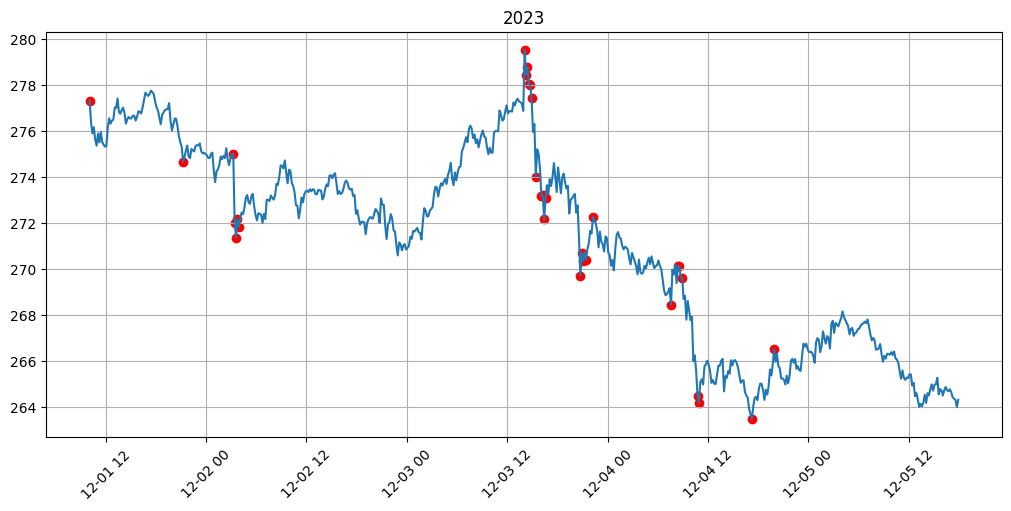

In [24]:
from etna.models import ProphetModel

anomaly_dict = get_anomalies_prediction_interval(ts, model=ProphetModel, interval_width=0.95)
plot_anomalies(ts, anomaly_dict)

### Инициализация тренера и вывод на экран целевого признака - цены закрытия

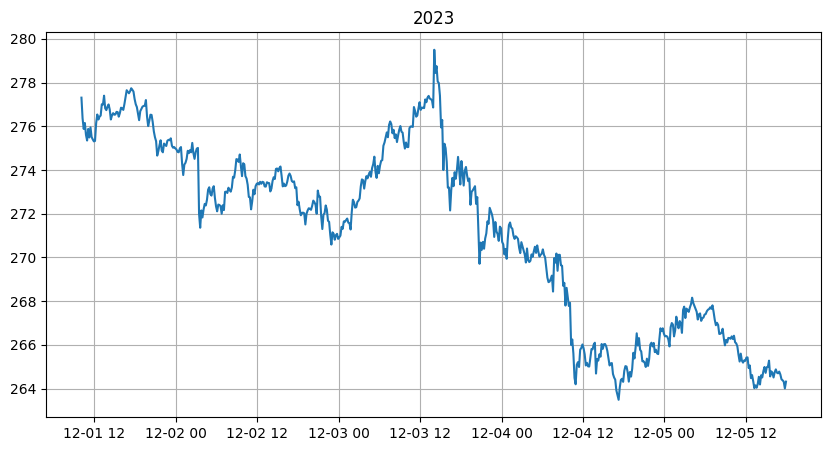

In [8]:
model_feature_selection = DecisionTreeRegressor(random_state=42)
feature_selector_transform = TreeFeatureSelectionTransform(model=model_feature_selection, top_k=10)

tr = Trainer(pipe_kwargs=catboost_pipe, feature_selector = feature_selector_transform)
ts = tr.prepare_df(df=sber_tradestats.copy(),
                  target_col='pr_close',
                  columns_to_drop=['ticker', 'tradedate', 'tradetime'], #['tradedate', 'tradetime'],
                  timestamp_column_name='systime')

ts.plot(column='target')


### Обучение стратегии (используем модель по умолчанию: Catboost)

In [9]:
train_ts, test_ts = split_data(ts, test_size=50)
tr.fit(train_ts=train_ts)


### Визуализация прогноза модели на тестовой подвыборке

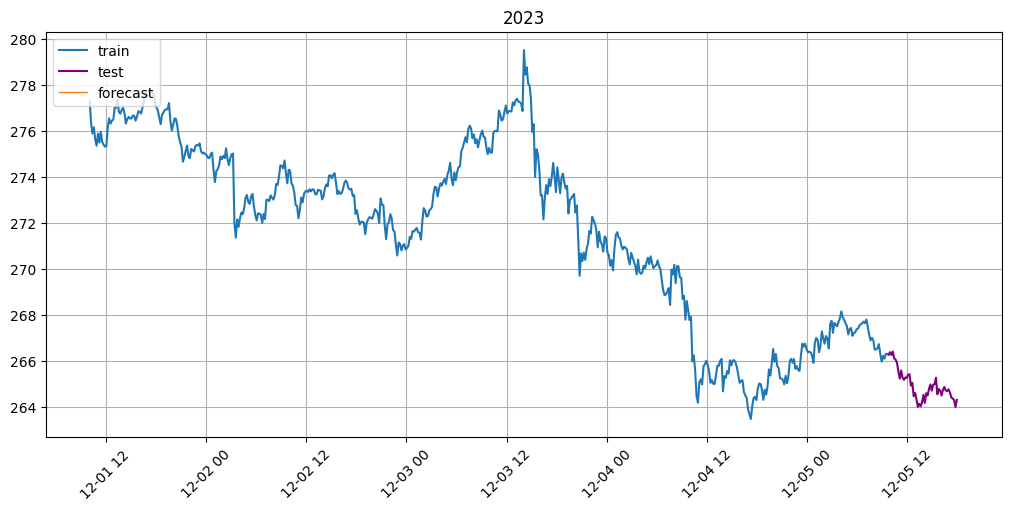

In [11]:
test_forecast = tr.forecast(test_ts)

plot_forecast(forecast_ts=test_forecast, test_ts=test_ts, train_ts=train_ts)

### Backtest (5 фолдов по умолчанию)

In [12]:
metrics_df, forecast_df, fold_info_df = tr.do_backtest(test_ts, metrics=[SMAPE(), MAE()])

metrics_df

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Do

,segment,SMAPE,MAE,fold_number
0,2023,0.051062,0.135057,0
0,2023,0.122791,0.324833,1
0,2023,0.136764,0.361741,2
0,2023,0.224617,0.593679,3
0,2023,0.116714,0.308679,4


# Визуализация результатов бэктеста

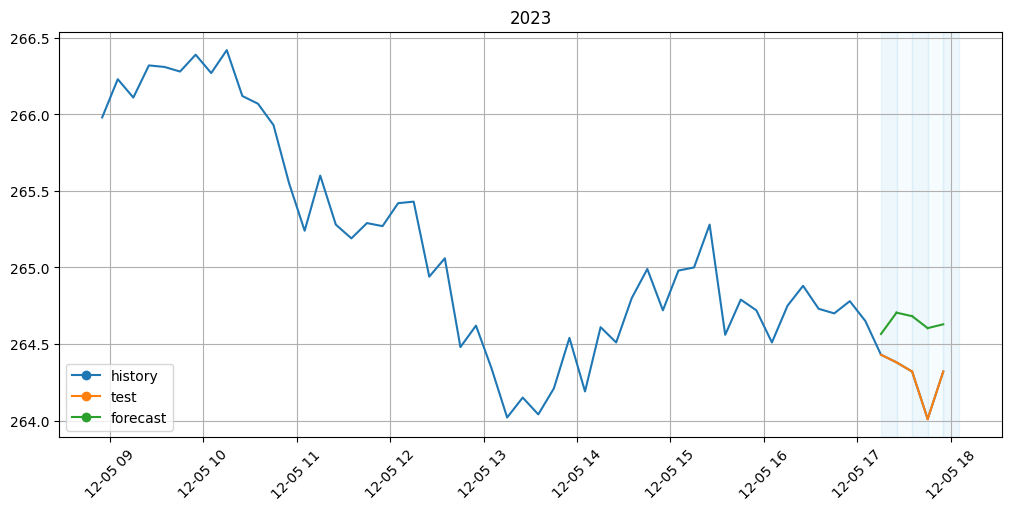

In [13]:
plot_backtest(forecast_df=forecast_df, ts=ts, history_len=50)

### Интерпретация модели через оценку значимости признаков (по умолчанию топ-5 признаков)

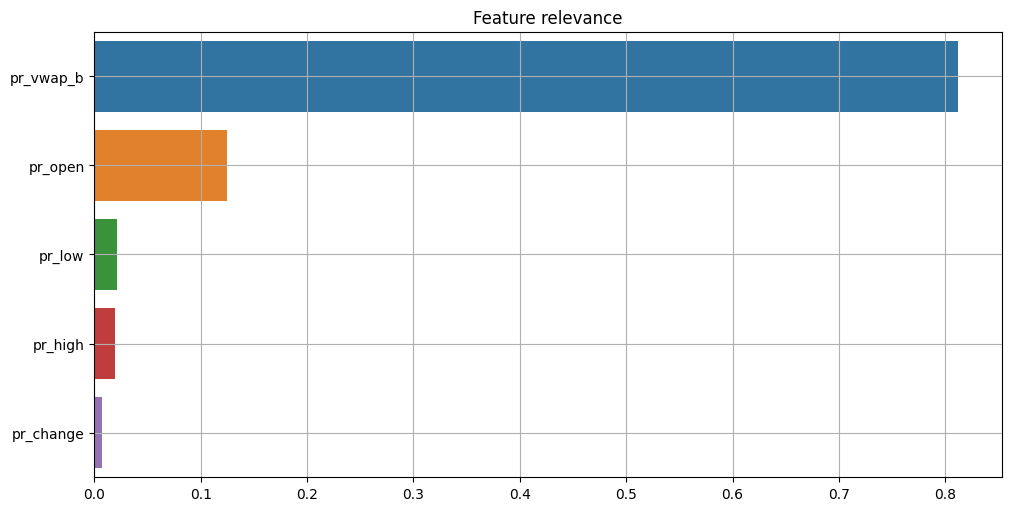

In [23]:

temp_ts = deepcopy(test_ts)
# temp_ts.fit_transform(transforms=[feature_selector_transform])

interpret_model(temp_ts)